In [183]:
import numpy as np
from pandas import read_csv
from scipy.optimize import curve_fit

df = pd.read_csv('stellar_evolution.csv')
df = df.set_index(df.mass)

x = df.index
y = df.l_min

# fitting l_min with exponential function
popt, _ = curve_fit(lambda x, a, b: a * x ** b, x, y)
a, b = popt
a, b

(0.8994825154104518, 4.182711149771404)

In [184]:
y_pred = df.index.map(lambda x: a * x ** b)

# r-squared fitness score
r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))
r2

0.9981403450049346

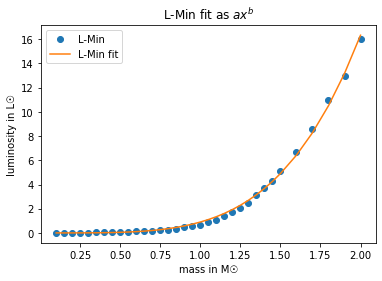

In [181]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
ax.set_title(r"L-Min fit as $ax^b$")
ax.plot(x, y, 'o', label='L-Min')
ax.plot(x, y_pred, '-', label='L-Min fit')
ax.set_xlabel('mass in M☉')
ax.set_ylabel('luminosity in L☉')
ax.legend()
plt.show()

In [173]:
# all l_min predicted values for mass [.1, 2.0] must be greater than 0
assert all(v >= 0 for v in y_pred)